In [1]:
import numpy as np #import library numpy untuk operasi numerik
import matplotlib.pyplot as plt #import matplotlib yang digunakan sebagai visualisasi gambar
#matplotlib inline
import cv2 #mengimport atau memanggil cv2 dari opencv untuk pengolahan citra serta pembacaan gambar
import matplotlib.image as mpimg #import library yang digunakan sebagai pembaca citra
from skimage import data #import data dari skimage sbagai acuan atau contoh 

image = cv2.imread("gambar/cyber.jpg", cv2.IMREAD_GRAYSCALE) #membaca atau menampilkan gambar 

In [2]:
image_equalized = cv2.equalizeHist(image) #pengequalisasian pada gambar dalam histogram 

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #pembuatan object clahe dengan parameter 8,8

#penerapan CLAHE to the original image
image_clahe = clahe.apply(image)

In [3]:
# pembuatan array kosong untuk menyimpan output akhir
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# penerapan kontras gambar min-max
min = np.min(image)
max = np.max(image)

#operasi perhitungan piksel dengan metode diatas
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

In [4]:
#membuat copy-an gambar dengan tipe data yang di float
copyCamera = image.copy().astype(float) 

m1,n1 = copyCamera.shape #proses mmendapatkan data copy
output1 = np.empty([m1, n1]) #pembuatan array kosong sebagai output
#proses perhitungan piksel dengan batasan nilai sesuai dengan data hasil copy
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

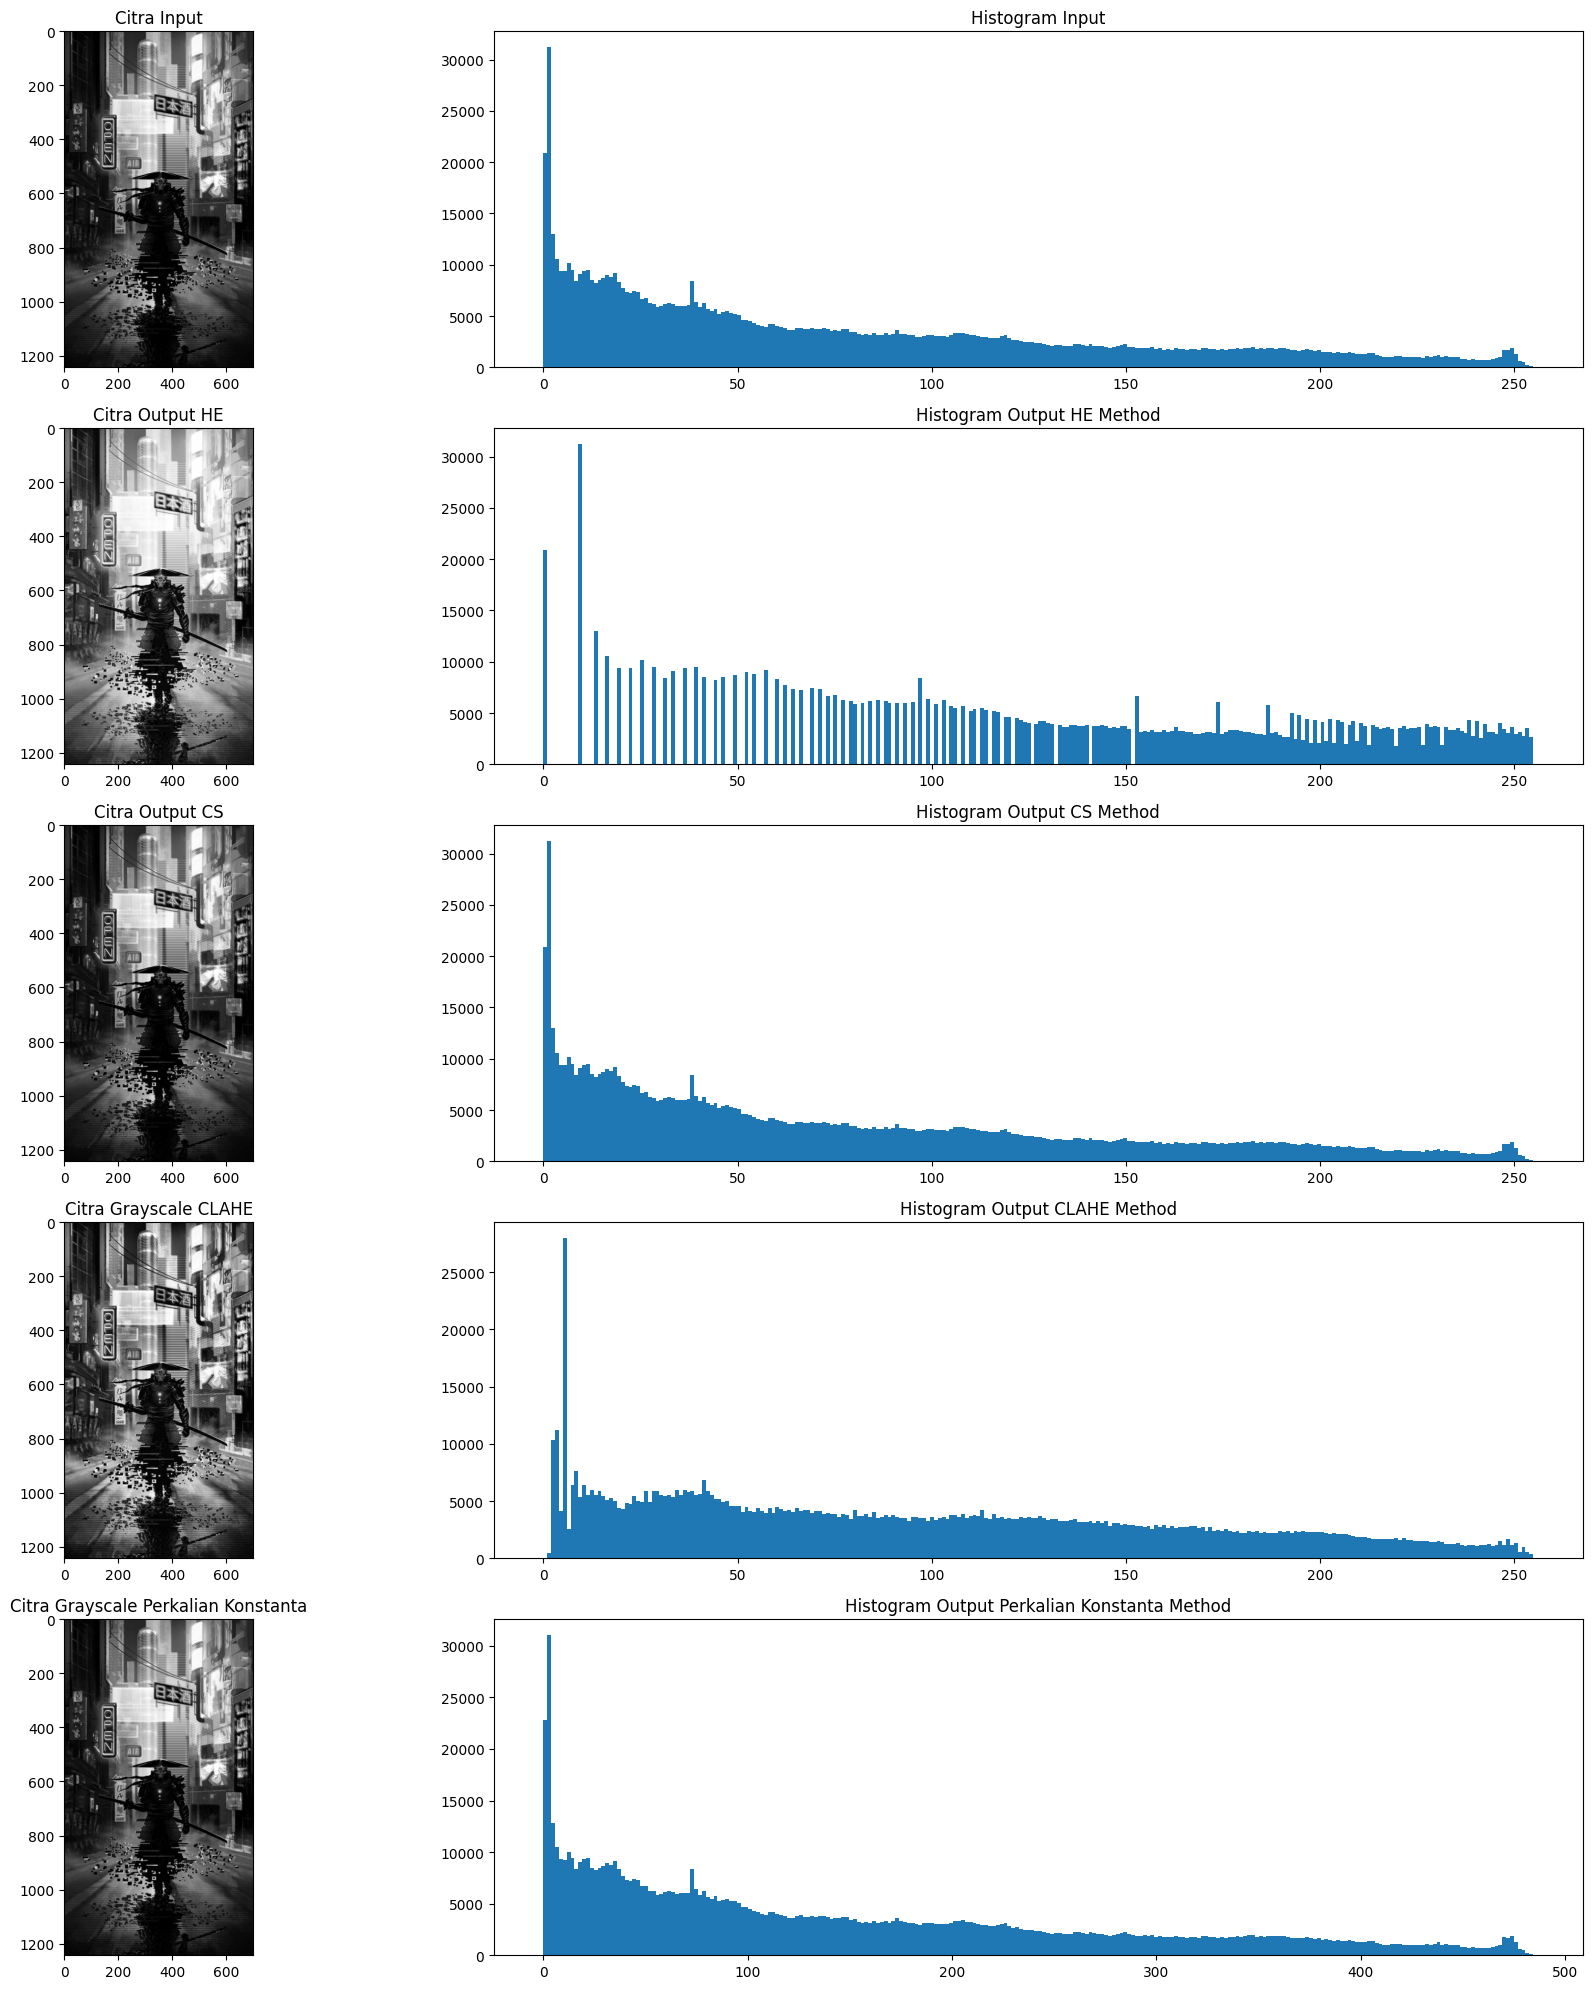

In [5]:
#pembuatan subplot untuk menampilkan hasil dari enhancment kontras
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()  # penyesuaian tata letak penampilan subplot yang akan divsualisasikan 
plt.show()  #menampilkan seluruh hasil yang didapatkan dari proses keseluruhan 